## Final Project

In [1]:
import sys, os, imp
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

C:\Users\alves\AppData\Local\Temp\ipykernel_23752\2822051079.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import sys, os, imp


In [2]:
# lumapiFile = "/opt/lumerical/v221/api/python/lumapi.py"
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
lumapi = imp.load_source("lumapi", lumapiFile)
fdtdAPI = lumapi.FDTD(hide = False)

## Parameters

In [3]:
# units
um = 1e-6
nm = 1e-9

In [4]:
# Materials 
sub_material = 'SiO2 (Glass) - Palik'
core_material = 'Si (Silicon) - Palik'
core_index = 3.47
sub_index = 1.44

In [5]:
# Waveguide parameters
wvg_width = 500 * nm
wvg_height = 220 * nm
L_box = 2 * um
L_rect = 3 * um
space = 0.2 * um

# Bandwidth operation
option = 3
# C Band simulation: 1520 - 1575 nm (1)
# L Band simulation: 1555 - 1635 nm (2)
# Article Band:      1500 - 1580 nm (3)
if option == 1:
    wvlngth_start = 1.520 * um
    wvlngth_stop = 1.575 * um
elif option == 2:
    wvlngth_start = 1.555 * um
    wvlngth_stop = 1.635 * um
else:
    wvlngth_start = 1.500 * um
    wvlngth_stop = 1.580 * um


filename = "splitter_base" 

## Create base geometry

In [6]:
fdtdAPI.switchtolayout()
fdtdAPI.deleteall()


#INPUT WAVEGUIDE
fdtdAPI.addrect()
fdtdAPI.set('name', 'input wg')
# fdtdAPI.set('material', core_material)
fdtdAPI.set('index', core_index)
fdtdAPI.set('x span', L_rect)
fdtdAPI.set('y span', wvg_width)
fdtdAPI.set('z span', wvg_height)
fdtdAPI.set('y', 0)
fdtdAPI.set('x', -(L_rect/2 + L_box/2))
fdtdAPI.set('z', 0)

#OUTPUT WAVEGUIDES
fdtdAPI.addrect()
fdtdAPI.set('name', 'output wg top')
# fdtdAPI.set('material', core_material)
fdtdAPI.set('index', core_index)
fdtdAPI.set('x span', L_rect)
fdtdAPI.set('y span', wvg_width)
fdtdAPI.set('z span', wvg_height)
fdtdAPI.set('y', wvg_width/2 + space/2)
fdtdAPI.set('x', L_rect/2 + L_box/2)
fdtdAPI.set('z', 0)

fdtdAPI.addrect()
fdtdAPI.set('name', 'output wg bottom')
# fdtdAPI.set('material', core_material)
fdtdAPI.set('index', core_index)
fdtdAPI.set('x span', L_rect)
fdtdAPI.set('y span', wvg_width)
fdtdAPI.set('z span', wvg_height)
fdtdAPI.set('y', -(wvg_width/2 + space/2))
fdtdAPI.set('x', L_rect/2 + L_box/2)
fdtdAPI.set('z', 0)

## Add Solver, monitors and source

In [7]:
# Solver dimensions
x_FDTD = 0
y_FDTD = 0
z_FDTD = 0
x_span_FDTD = L_box*1.5
y_span_FDTD = L_box*1.5
z_span_FDTD = 0.5*um

mesh_x = 20 * nm
mesh_y = 20 * nm
finer_mesh_size = 2.5 * um

pml_layers = 12 #For all profiles, increasing the number of layers will usually lead to lower reflections.
mesh_accuracy = 2
condition = 'Anti-Symmetric'

In [8]:
fdtdAPI.switchtolayout()
fdtdAPI.select('FDTD')
fdtdAPI.delete()
fdtdAPI.select('mesh')
fdtdAPI.delete()
fdtdAPI.select('opt_fields')
fdtdAPI.delete()
fdtdAPI.select('fom')
fdtdAPI.delete()
fdtdAPI.select('source')
fdtdAPI.delete()

# Add Solver FDTD 2D
fdtdAPI.addfdtd()
fdtdAPI.set('dimension', '2D')
# fdtdAPI.set("background material", sub_material)
fdtdAPI.set('background index', sub_index);
fdtdAPI.set("mesh accuracy", mesh_accuracy)
fdtdAPI.set('force symmetric y mesh', True)
fdtdAPI.set("y min bc", condition )
fdtdAPI.set('pml layers', pml_layers)
fdtdAPI.set("x", x_FDTD)
fdtdAPI.set("x span", x_span_FDTD)
fdtdAPI.set("y", y_FDTD)
fdtdAPI.set("y span", y_span_FDTD)
fdtdAPI.set("z", z_FDTD)

# Add Mesh
fdtdAPI.addmesh() 
fdtdAPI.set("x", x_FDTD)
fdtdAPI.set("x span", finer_mesh_size + 2.0*mesh_x)
fdtdAPI.set("y", y_FDTD)
fdtdAPI.set("y span", finer_mesh_size)
fdtdAPI.set("z", z_FDTD)
fdtdAPI.set("z span", z_span_FDTD)

# Add Monitors
fdtdAPI.addpower()
fdtdAPI.set('name', 'opt_fields')
fdtdAPI.set('monitor type', '2D z-normal')
fdtdAPI.set('x', x_FDTD)
fdtdAPI.set('x span', finer_mesh_size)
fdtdAPI.set('y', y_FDTD)
fdtdAPI.set('y span', finer_mesh_size)

# Add FOM
fdtdAPI.addpower()
fdtdAPI.set('name', 'fom')
fdtdAPI.set('monitor type', '2D x-normal')
fdtdAPI.set('x', finer_mesh_size/2.0)
fdtdAPI.set('y', 0)
fdtdAPI.set('y span', y_span_FDTD)
fdtdAPI.set('z', z_FDTD)
fdtdAPI.set('z span', 1.2*um)

# Add source
fdtdAPI.switchtolayout()
fdtdAPI.select
fdtdAPI.addmode()
fdtdAPI.set('direction','Forward')
fdtdAPI.set('injection axis','x-axis')
fdtdAPI.set('mode selection','fundamental TE mode')
fdtdAPI.set('override global source settings', False);
fdtdAPI.set('x', -finer_mesh_size/2)
fdtdAPI.set('y', z_FDTD)
fdtdAPI.set('y span', y_span_FDTD)
fdtdAPI.set('z', z_FDTD)
fdtdAPI.set('z span', 1.2*um)

## Save file

In [9]:
fdtdAPI.save(filename)

## Optimization

CONFIGURATION FILE {'root': 'C:\\Users\\alves\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages', 'lumapi': ''}
Accurate interface detection enabled


C:\Users\alves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lumopt\utilities\plotter.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


C:\Users\alves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lumopt\utilities\plotter.py:19: UserWarning: Ignoring file format 'mp4' which is not supported by SnapShots; using png instead.
  self.temp_prefix, self.frame_format = self.outfile.split('.')


Running scipy optimizer
bounds = [[0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]]
start = [0.25       0.27916667 0.30833333 0.3375     0.36666667 0.39583333
 0.425      0.45416667 0.48333333 0.5125     0.54166667 0.57083333
 0.6       ]
Running forward solves
FOM = 0.5849219677319193
Running adjoint solves
Calculating gradients
Getting d eps: dx = 1e-09
.............
Plots updated with iteration 0 results
Saved frame
Running forward solves
FOM = 0.23787104268651849
Running adjoint solves
Calculating gradients
Getting d eps: dx = 1e-09
.............
Running forward solves
FOM = 0.8173300614087082
Running adjoint solves
Calculating gradients
Getting d eps: dx = 1e-09
.............
Plots updated with iteration 1 results
Saved frame
Running forward solves
FOM = 0.916940511793289
Running adjoint solves
Calculating gradients
Getting d eps: dx = 1e-09
.............
Plots updated with iteration 2 res

(np.float64(0.9349168683840842),
 array([0.40100846, 0.35870128, 0.35743687, 0.25717049, 0.2541904 ,
        0.32473009, 0.49910593, 0.53100873, 0.54846788, 0.58649472,
        0.55194657, 0.60182184, 0.58079036]))

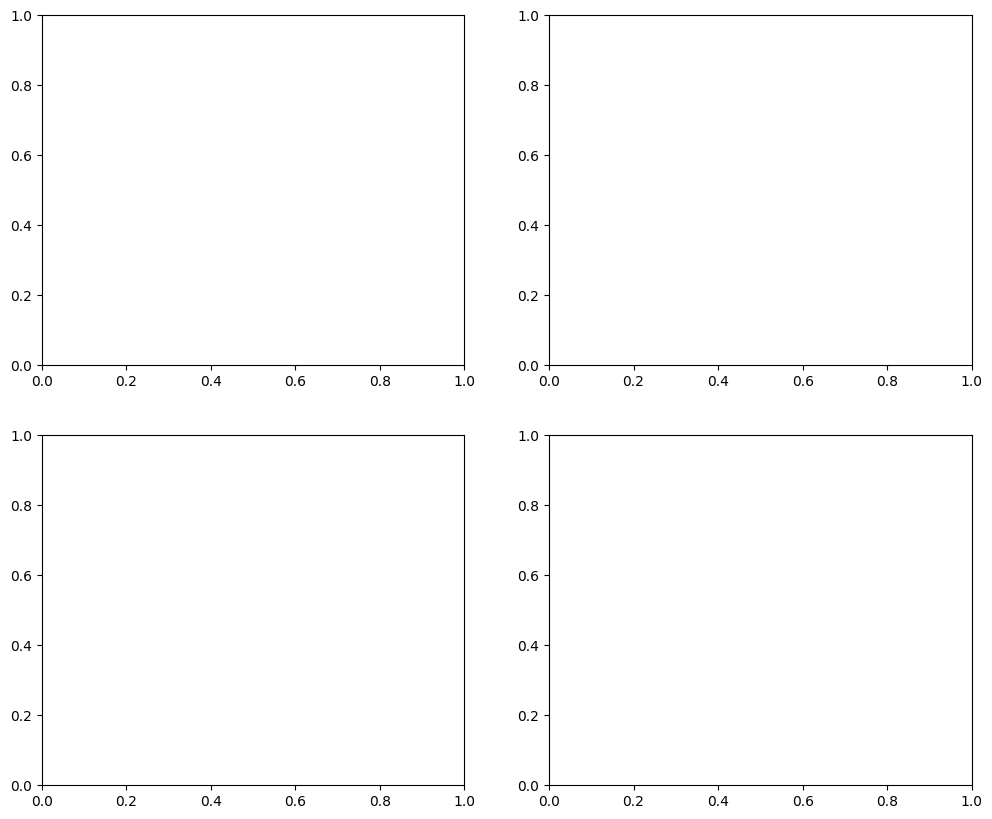

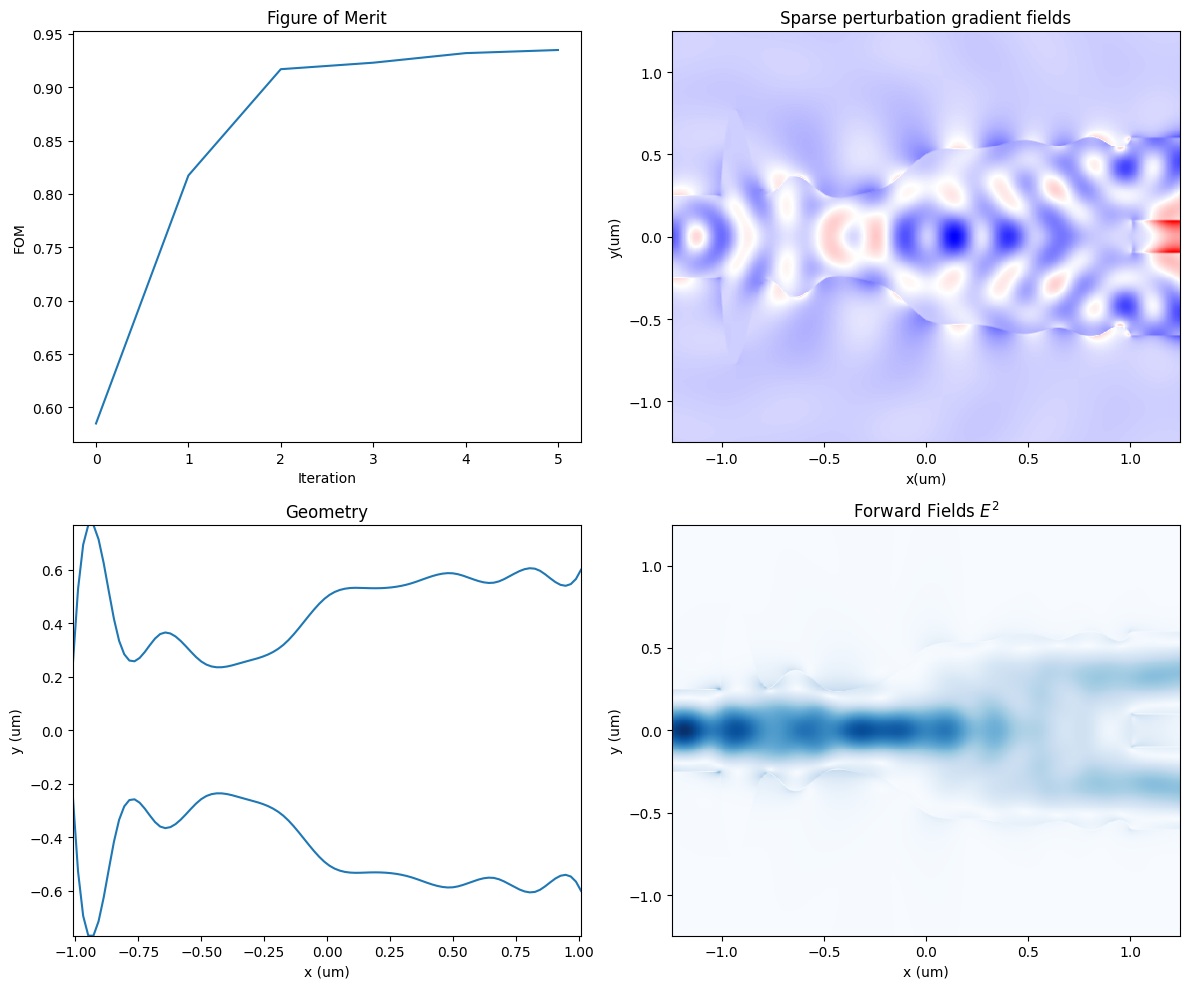

In [ ]:
from lumopt.utilities.wavelengths import Wavelengths
from lumopt.geometries.polygon import FunctionDefinedPolygon
from lumopt.figures_of_merit.modematch import ModeMatch
from lumopt.optimizers.generic_optimizers import ScipyOptimizers
from lumopt.optimization import Optimization
from lumopt.utilities.plotter import Plotter

# Base file
base_script = os.path.join(os.getcwd(), f'{filename}.fsp')

wavelengths = Wavelengths(start = wvlngth_start, stop = wvlngth_stop, points = 21)

initial_points_x = np.linspace(-L_box/2, L_box/2, 13)
initial_points_y = np.linspace(wvg_width/2, wvg_width + space/2, initial_points_x.size)

def taper_splitter(params = initial_points_y):
    ''' Defines a taper where the paramaters are the y coordinates of the nodes of a cubic spline. '''
    points_x = np.concatenate(([initial_points_x.min() - 0.01e-6], initial_points_x, [initial_points_x.max() + 0.01e-6]))
    points_y = np.concatenate(([initial_points_y.min()], params, [initial_points_y.max()]))
    n_interpolation_points = 100
    polygon_points_x = np.linspace(min(points_x), max(points_x), n_interpolation_points)
    interpolator = sp.interpolate.interp1d(points_x, points_y, kind = 'cubic')
    polygon_points_y = interpolator(polygon_points_x)
    polygon_points_up = [(x, y) for x, y in zip(polygon_points_x, polygon_points_y)]
    polygon_points_down = [(x, -y) for x, y in zip(polygon_points_x, polygon_points_y)]
    polygon_points = np.array(polygon_points_up[::-1] + polygon_points_down)
    return polygon_points

bounds = [(0.2e-6, 0.8e-6)] * initial_points_y.size

geometry = FunctionDefinedPolygon(func = taper_splitter, initial_params = initial_points_y, bounds = bounds, z = 0.0, depth = wvg_height, eps_out = sub_index ** 2, eps_in = core_index ** 2, edge_precision = 5, dx = 1*nm)

fom = ModeMatch(monitor_name = 'fom', mode_number = 2, direction = 'Forward', multi_freq_src = True, target_T_fwd = lambda wl: np.ones(wl.size), norm_p = 1)

optimizer = ScipyOptimizers(max_iter = 20, method = 'L-BFGS-B', scaling_factor = 1/um, pgtol = 1e-5)

opt = Optimization(base_script = base_script, wavelengths = wavelengths, fom = fom, geometry = geometry, optimizer = optimizer, hide_fdtd_cad = False, use_deps = True, plot_history = False)

plot = Plotter(movie=False, plot_history=False)

opt.run()
